# Task 2

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
 

In [19]:
x, y = make_blobs(n_samples=100, centers=3,
                  random_state=2, cluster_std=0.40)

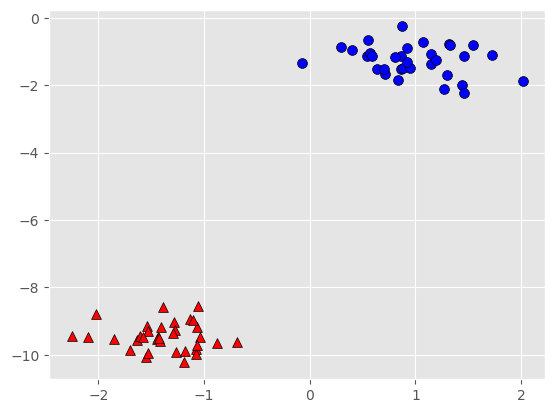

In [20]:
plt.style.use('ggplot')

plt.scatter(x[y==0, 0], x[y==0, 1], s=50, c = 'r', marker='^', edgecolor='black');
plt.scatter(x[y==1, 0], x[y==1, 1], s=50, c = 'b', marker='o', edgecolor='black');

In [21]:
from sklearn.svm import SVC

In [22]:
def clasify(x, y, classifier):
    x1_min, x1_max = x[:, 0].min() - 1, x[:,0].max() +1
    x2_min, x2_max = x[:, 1].min() - 1, x[:,1].max() +1
    
    step = 0.01
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, step),
                       np.arange(x2_min, x2_max, step))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha =0.3, cmap ='winter')
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    markers=('s', '^', 'o', 'x')
    colors = ('red', 'blue', 'lightgreen', 'gray')
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cl, 0],
                    y=x[y == cl, 1],
                    alpha=0.9,
                    c = colors[idx],
                    marker = markers[idx],
                    label = cl,
                    edgecolor='black'
                   )  
    

In [23]:
svm = SVC(kernel='rbf', random_state = 1, gamma = 0.1, C= 10)
svm.fit(x, y)

SVC(C=10, gamma=0.1, random_state=1)

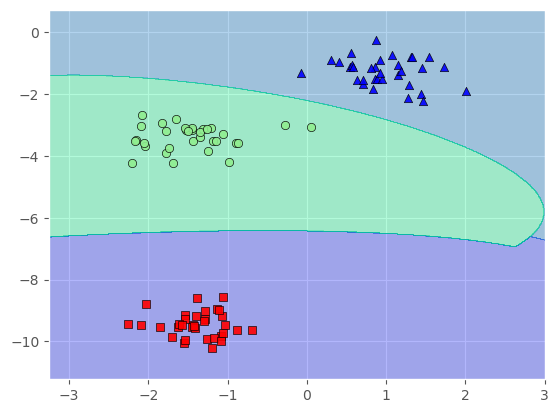

In [24]:
clasify(x, y, svm)

## KNeighborsClassifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors=3, p = 1, weights='uniform' )
knn.fit(x, y)

KNeighborsClassifier(n_neighbors=3, p=1)

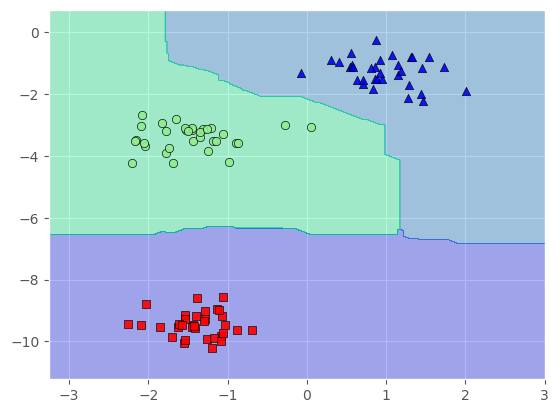

In [27]:
clasify(x, y, knn)